In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("train.csv")

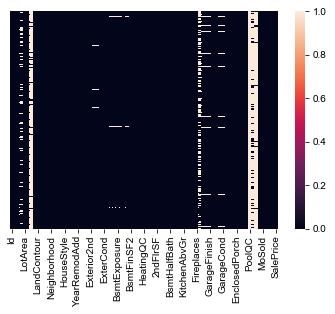

In [4]:
sns.heatmap(df.isnull(),yticklabels=False)
sns.set(rc={"figure.figsize":(10, 19)}) #width=9, height=10

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [6]:
drop_col = ['Alley','Fence']
for x in drop_col:
    df.drop(x,1, inplace = True)



In [7]:
df['FireplaceQu'].fillna("NA",inplace = True)

In [8]:
df2 = pd.DataFrame()

In [9]:
df['LotFrontage'].fillna(df["LotFrontage"].mean(),inplace = True)

In [10]:
df['LotFrontage'].value_counts()

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
106.000000      1
38.000000       1
140.000000      1
138.000000      1
137.000000      1
Name: LotFrontage, Length: 111, dtype: int64

In [11]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [12]:
df['GarageType'].fillna("Attchd",inplace = True)

In [15]:
df.isnull().sum().sort_values().tail(20)

YearBuilt          0
Exterior2nd        0
ExterQual          0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType2      38
GarageYrBlt       81
GarageFinish      81
GarageCond        81
GarageQual        81
MiscFeature     1406
PoolQC          1453
dtype: int64

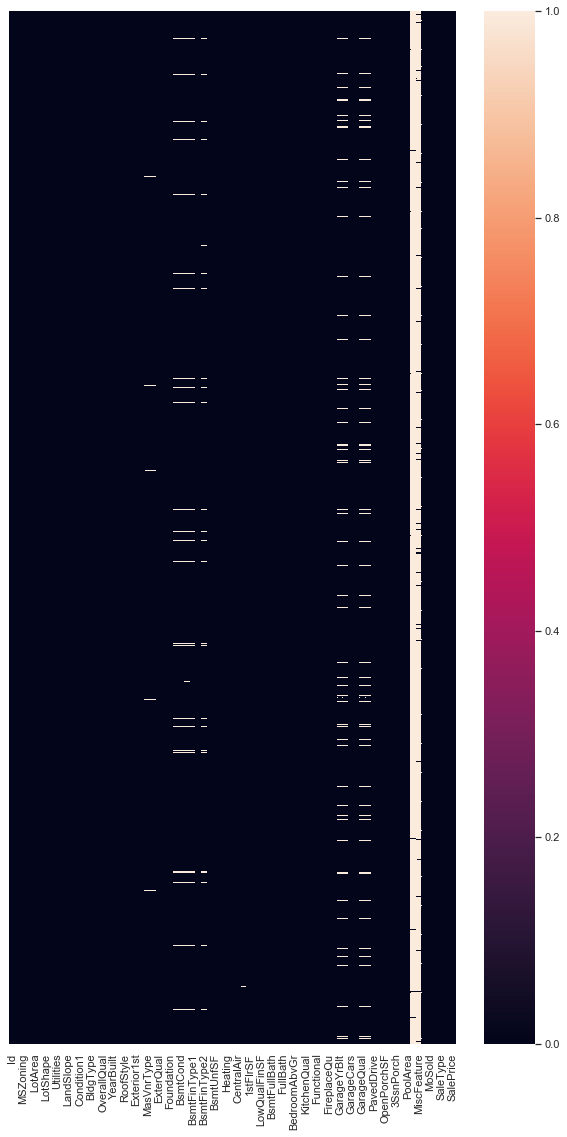

In [14]:
sns.heatmap(df.isnull(),yticklabels=False)

In [16]:
for x in ['PoolQC','MiscFeature']:
    df.drop(x,1, inplace = True)


In [19]:
df.isnull().sum().sort_values().tail(20)

RoofMatl         0
BsmtFinSF1       0
Exterior1st      0
Exterior2nd      0
Foundation       0
ExterCond        0
ExterQual        0
YearBuilt        0
Electrical       1
MasVnrArea       8
MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
dtype: int64

In [21]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [30]:
df['GarageYrBlt'].fillna('2005',inplace = True)

In [34]:
df['GarageFinish'].fillna('Unf',inplace = True)

In [38]:
df['GarageFinish'].mode()[0]

'Unf'

In [39]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [41]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [44]:
for x in ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']:
    df[x].fillna(df[x].mode()[0],inplace=True)


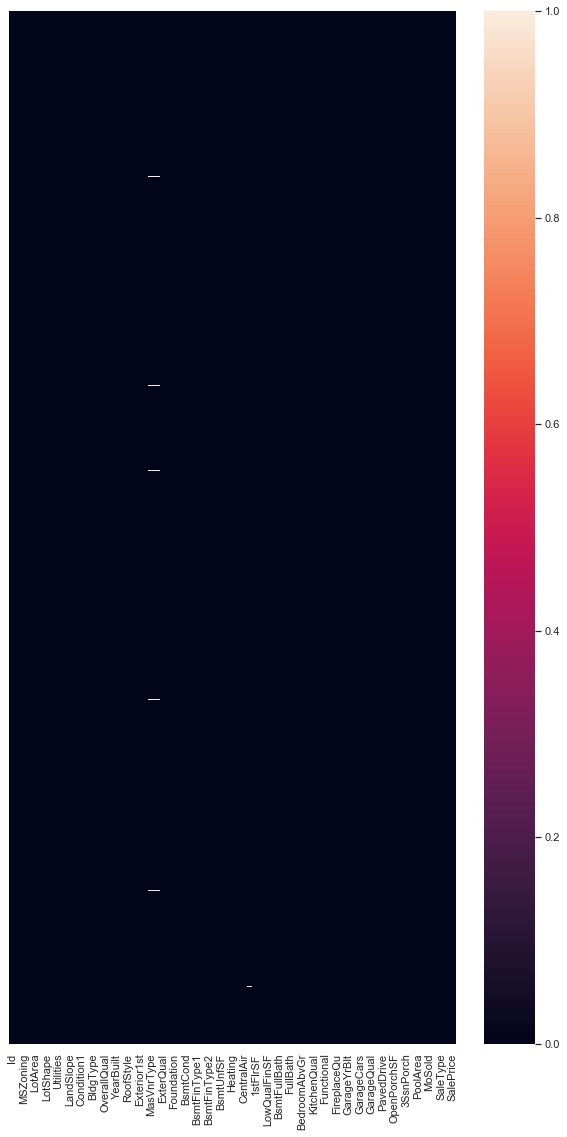

In [45]:
sns.heatmap(df.isnull(),yticklabels=False)

In [46]:
df.dropna(1,inplace=True)

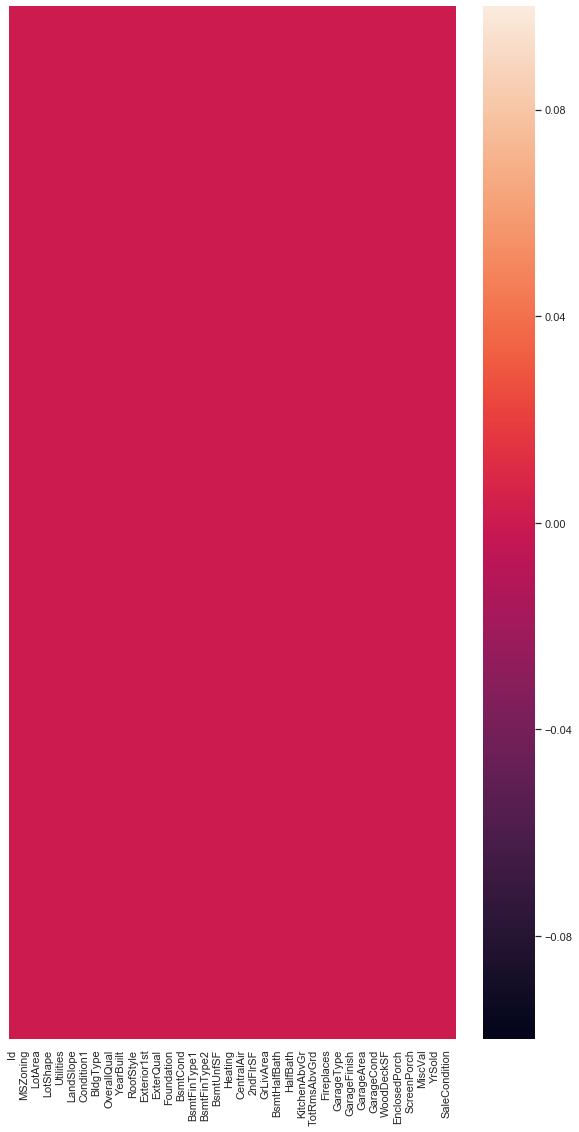

In [47]:
sns.heatmap(df.isnull(),yticklabels=False)

In [56]:
X= df.drop('SalePrice',1)
y =df['SalePrice']

In [57]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train,y_train)

ValueError: could not convert string to float: 'RL'